## Observations and Insights 

Of the drug regimens studied for the treatment of tumors Calmoulin and Ramicane were by far the most effective. These two drug regimens yielded the lowest mean, median, and final tumor volumes with comparatively small data spread as measured by variance, standard deviation, and standard error of the mean. Additionally, the animals that recieved these two treatmens appeared to survive the longest as they yieled the most amount of mice in the test groups after 45 timepoints. Additionally, Ramicane treatment resulted in a greater average reduction of tumor size with slightly less variance than Calmoulin treatment, but the margin between the efficacy of the two treatments was very small. Additionally there was a fairly strong correlation between mean tumor size and mouse weight, indicating that the heavier mice tended to have larger tumors than the lighter mice after treatment, although the starting tumor volume for all of the mice was the same (45mm^3) at the beginning of treatment.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how='inner')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice in the DataFrame.
len(combined_data['Mouse ID'].unique())

249

In [4]:
#get array of duplicated mice with multiple values for both ID and Timepoint
dups_series = combined_data.duplicated(['Mouse ID','Timepoint'], keep = 'last')

#get index values of duplicate mouse
dups_series[dups_series].index.values

array([908, 910, 912, 914, 916])

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.iloc[908:918,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#rename column becuase I cant figure out how to use this filter if there is a space in the column title at the moment
combined_data.rename(columns= {'Mouse ID':"ID"}, inplace=True)

#delete the duplicate mouse from the dataset
combined_data = combined_data[combined_data.ID != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_data['ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#gropby drug type and calculate summary statistics then convert series to data frame for merging
drug_means = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].mean().to_frame()
drug_medians = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].median().to_frame()
drug_variance = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].var().to_frame()
drug_std = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].std().to_frame()
drug_sem = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].sem().to_frame()

#rename columns to appropriate column titles to merge
drug_means.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Means"}, inplace=True)
drug_medians.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Medians"}, inplace=True)
drug_variance.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"}, inplace=True)
drug_std.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"}, inplace=True)
drug_sem.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume SEM"}, inplace=True)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#merge series to dataframe
regimen_frame = drug_means.merge(drug_medians, left_index = True, right_on = 'Drug Regimen')
regimen_frame = regimen_frame.merge(drug_variance, left_index = True, right_on = 'Drug Regimen')
regimen_frame = regimen_frame.merge(drug_std, left_index = True, right_on = 'Drug Regimen')
regimen_frame = regimen_frame.merge(drug_sem, left_index = True, right_on = 'Drug Regimen')

#display aggregate data
regimen_frame


,Tumor Volume Means,Tumor Volume Medians,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

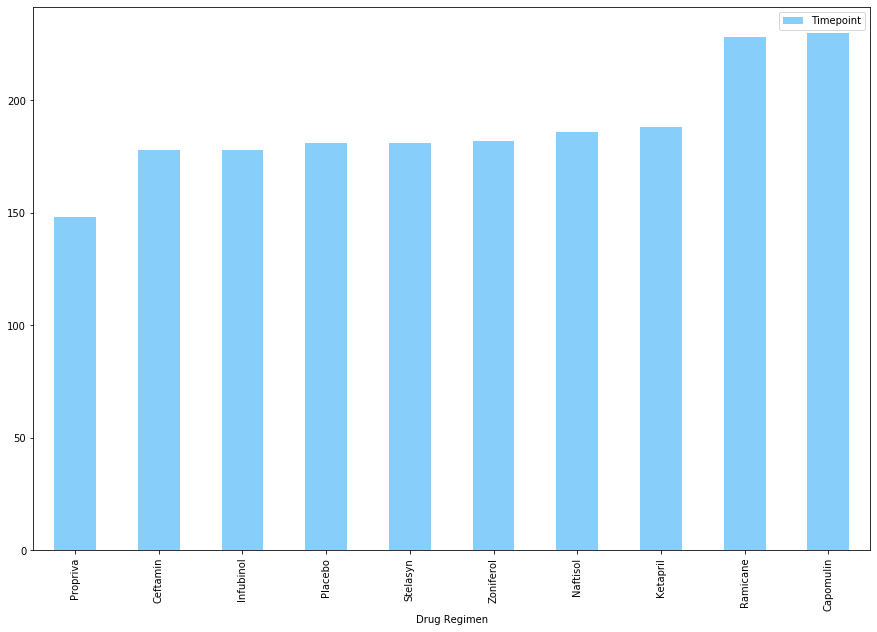

In [21]:
#count total time point values per drug regimen, convert to DF, sort values. 
overtime = combined_data.groupby(by = ['Drug Regimen'])["Timepoint"].count().to_frame().sort_values(by = ['Timepoint'])

#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
xlabel = 'Drug Regiment'

overtime.plot(kind='bar', use_index = True,
             color = ['lightskyblue'],  figsize=(15,10))

In [22]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_labels = combined_data["Sex"].unique()

# find gender counts
gender_data = combined_data.groupby(['Sex']).count()

# assign pie plot values
gender_values = [958,925]

#colors for plotting
colors = ['red', 'lightskyblue']

#distance of plot section break
explode = (0.1, 0)

# gender_data.plot(kind = 'pie', y = "Timepoint", explode=explode, labels = pie_labels, colors = colors, 
#                  autopct="%1.1f%%", shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x1a1b76ef10>,
 [Text(-1.1995453372764304, -0.033030044177607666, 'Male'),
  Text(1.099583225836728, 0.030277540496140714, 'Female')],
 [Text(-0.6997347800779178, -0.01926752577027114, '50.9%'),
  Text(0.5997726686382152, 0.016515022088804024, '49.1%')])

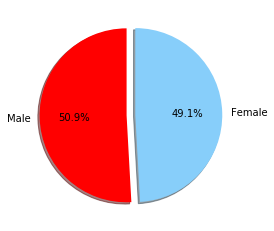

In [38]:
#colors for plotting
colors = ['red', 'lightskyblue']

#distance of plot section break
explode = (0.1, 0)

#plot pie chart
plt.pie(gender_values, explode=explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# find the final volumes of tumors in all mice tested
final_volumes = combined_data.drop_duplicates(subset='ID', keep="last")

# drop mice with only one timepoint at timepoint = 0
final_volumes = final_volumes[final_volumes.Timepoint != 0]

# create empty lists to collect values
cap_values = []
ram_values = []
cet_values = []
inf_values = []

# iterate through data and collect maximum tumor volume list for each treatment, typecast as float for calculation
for i in final_volumes.itertuples():
    if i[2]=='Capomulin':
        cap_values.append(float(i[7]))

for i in final_volumes.itertuples():
    if i[2]=='Ramicane':
        ram_values.append(float(i[7]))       

for i in final_volumes.itertuples():
    if i[2]=='Ceftamin':
        cet_values.append(float(i[7]))  

for i in final_volumes.itertuples():
    if i[2]=='Infubinol':
        inf_values.append(float(i[7]))  
        
# get IQR for each drug regiment in question
cap_iqr = stats.iqr(cap_values, interpolation = 'midpoint')
ram_iqr = stats.iqr(ram_values, interpolation = 'midpoint')
cet_iqr = stats.iqr(cet_values, interpolation = 'midpoint')
inf_iqr = stats.iqr(inf_values, interpolation = 'midpoint')

# transform list to series for calculation
cap_values = pd.Series(cap_values)
ram_values = pd.Series(ram_values)
cet_values = pd.Series(cet_values)
inf_values = pd.Series(inf_values)

#calculate capomulin IQR and outlier boundaries
cap_quarts = cap_values.quantile([.25, .5, .75])
cap_low = cap_quarts[0.25]
cap_high = cap_quarts[0.75]
cap_upper = cap_high + (1.5 * cap_iqr)
cap_lower = cap_low - (1.5 * cap_iqr)

#calculate Ramicane IQR and outlier boundaries
ram_quarts = ram_values.quantile([.25, .5, .75])
ram_low = ram_quarts[0.25]
ram_high = ram_quarts[0.75]
ram_upper = ram_high + (1.5 * ram_iqr)
ram_lower = ram_low - (1.5 * ram_iqr)

#calculate Ceftamin IQR and outlier boundaries
cet_quarts = cet_values.quantile([.25, .5, .75])
cet_low = cet_quarts[0.25]
cet_high = cet_quarts[0.75]
cet_upper = cet_high + (1.5 * cet_iqr)
cet_lower = cet_low - (1.5 * cet_iqr)

#calculate Infubinol IQR and outlier boundaries
inf_quarts = inf_values.quantile([.25, .5, .75])
inf_low = inf_quarts[0.25]
inf_high = inf_quarts[0.75]
inf_upper = inf_high + (1.5 * inf_iqr)
inf_lower = inf_low - (1.5 * inf_iqr)

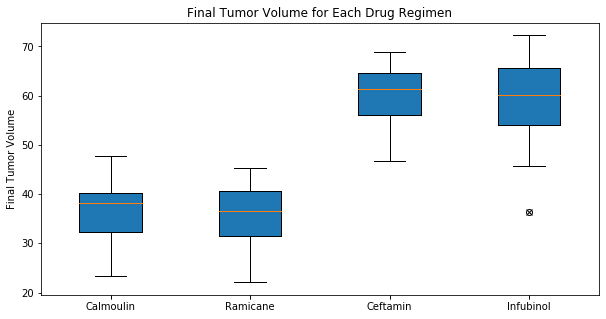

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [cap_values, ram_values, cet_values, inf_values]

# define fig atributes
fig = plt.figure(1, figsize=(10, 5))

# variable for subplot
ax1 = fig.add_subplot(111)

# create handle for boxplot
box = ax1.boxplot(box_data, patch_artist=True)

# format and plot boxplot
ax1.set_title('Final Tumor Volume for Each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(box_data)
ax1.set_xticklabels(['Calmoulin', 'Ramicane', 'Ceftamin', 'Infubinol'])
for flier in box['fliers']:
    flier.set(marker='x', color='#1b9e77', alpha=1.0)

plt.show()

## Line and Scatter Plots

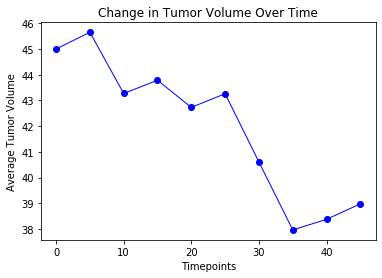

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_data.rename(columns = {'Drug Regimen':'DR'}, inplace=True)

#return DF with only capomulin data
cap_data = combined_data[combined_data.DR == 'Capomulin']

#return DF of only one mouse treated with capomulin
mouse_dat = cap_data[cap_data.ID == 'b128']

#covnert columns to list for plotting
x_axis = mouse_dat['Timepoint'].tolist()
y_axis = mouse_dat['Tumor Volume (mm3)'].tolist()

#plot and format the linegraph
plt.plot(x_axis, y_axis, marker="o", color="Blue", linewidth=1, label="Tumor Volume")
plt.xlabel('Timepoints')
plt.ylabel('Average Tumor Volume')
plt.title('Change in Tumor Volume Over Time')
plt.show()

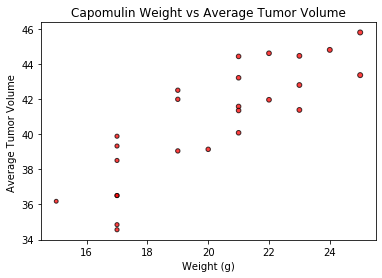

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Group Capomulin DF by ID and caluclate average tumor volume and weight 
cap_avgvol = cap_data.groupby(['ID'])['Tumor Volume (mm3)'].mean().to_frame()
cap_weights = cap_data.groupby(['ID'])['Weight (g)'].mean().to_frame()

# Merge Pandas series to DF, verify Data Matches
scatter_df = cap_avgvol.merge(cap_weights, left_index=True, right_index=True)

# Convert columns to lists for graphing
vol_list = scatter_df['Tumor Volume (mm3)'].tolist()
weight_list  = scatter_df['Weight (g)'].tolist()

# Plot
plt.scatter(weight_list, vol_list, marker="o", facecolors="red", edgecolors="black",
            s=weight_list, alpha=.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume ')
plt.title('Capomulin Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for mice treated with Capomulin is 0.84


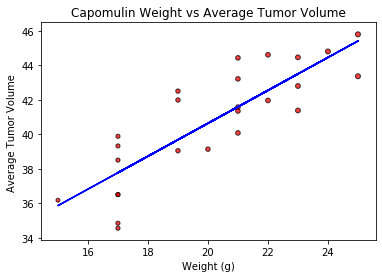

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correlation coefficient
correlation = stats.pearsonr(weight_list,vol_list)

#print the correlation coefficient
print(f"The correlation coefficient between weight and average tumor volume for mice treated with Capomulin is {round(correlation[0],2)}")

#convert data list to series type for calculation.
weight_series = pd.Series(weight_list)

#calulate linear regression values and fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_list, vol_list)

#calculate linear regression line (Y) values for plotting
regress_values = weight_series * slope + intercept

#plot linear regression line on scatter plot 
plt.plot(weight_list,regress_values,"b-")
plt.scatter(weight_series, vol_list, marker="o", facecolors="red", edgecolors="black",
            s=weight_list, alpha=.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume ')
plt.title('Capomulin Weight vs Average Tumor Volume')
plt.show()